In [10]:
import pandas as pd

In [22]:
nhl_odds = pd.read_csv('/Users/ojaimes/Documents/school/CMPUT466/nhl-over-under/degeneracy/bet_csvs/all_betting_data.csv')
# turn all nans to 0
print(nhl_odds.shape)
new_rows = []
# iterate through each row of the dataframe
nhl_odds = nhl_odds.fillna(0)
for index, row in nhl_odds.iterrows():
    try:
        if '½' in str(row['CloseOU']):
            s = row['CloseOU'].split('½')
            g = int(s[0])
            g += 0.5
            row['CloseOU'] = g
            new_rows.append(row)
            
        elif '½' in str(row['Close OU']):
            s = row['Close OU'].split('½')
            g = int(s[0])
            g += 0.5
            row['Close OU'] = g

            new_rows.append(row)
            
        if(float(row['CloseOU']) and float(row['Close OU'])):
            new_rows.append(row)
    except Exception as e:
        continue
    
print(len(new_rows))
    
# replace the old dataframe with the new rows
nhl_odds = pd.DataFrame(new_rows)

# turn all nans to 0

# make dataframe indices start at 0
nhl_odds = nhl_odds.reset_index()


nhl_odds

(22790, 21)
22852


,index,Unnamed: 0,Date,Rot,VH,Team,1st,2nd,3rd,Final,...,PuckLine,Unnamed: 11,OpenOU,Unnamed: 13,CloseOU,Unnamed: 15,Open OU,Close OU,Unnamed: 0.1,Puck Line
0,0,0,113.0,41.0,V,Pittsburgh,1.0,1.0,1.0,3,...,1.5,-310,6.0,-110,6.0,105,0,0,0.0,0.0
1,1,1,113.0,42.0,H,Philadelphia,2.0,1.0,3.0,6,...,-1.5,260,6.0,-110,6.0,-125,0,0,0.0,0.0
2,2,2,113.0,43.0,V,Montreal,2.0,1.0,1.0,0,...,1.5,-220,6.0,-110,6.0,-110,0,0,0.0,0.0
3,3,3,113.0,44.0,H,Toronto,1.0,2.0,1.0,1,...,-1.5,195,6.0,-110,6.0,-110,0,0,0.0,0.0
4,4,4,113.0,45.0,V,Chicago,0.0,0.0,1.0,1,...,1.5,-125,6.5,-110,6.5,-110,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22847,22785,2629,605.0,8.0,H,Nashville,1.0,2.0,1.0,4,...,0.0,215,0,-125,0,-135,5.5,5.5,0.0,-1.5
22848,22786,2630,608.0,9.0,V,Nashville,0.0,0.0,0.0,0,...,0.0,-205,0,110,0,-103,5.5,5.5,0.0,1.5
22849,22787,2631,608.0,10.0,H,Pittsburgh,3.0,3.0,0.0,6,...,0.0,175,0,-130,0,-117,5.5,5.5,0.0,-1.5
22850,22788,2632,611.0,11.0,V,Pittsburgh,0.0,0.0,2.0,2,...,0.0,-290,0,100,0,120,5.5,5.5,0.0,1.5


In [12]:

new_rows = []
# iterate through each row in the dataframe

for index, row in nhl_odds.iterrows():
   if not index % 2 == 0 and not index == 0:
        # get previous row 
        try:
            previous_row = nhl_odds.iloc[index - 1]
            row['Final'] = int(row['Final']) + int(previous_row['Final'])
            new_rows.append(row)
        except Exception as e:
            print(e)
            continue

# replace rows with new rows
df = pd.DataFrame(new_rows)
df

invalid literal for int() with base 10: 'F'
cannot convert float NaN to integer


,index,Unnamed: 0,Date,Rot,VH,Team,1st,2nd,3rd,Final,...,PuckLine,Unnamed: 11,OpenOU,Unnamed: 13,CloseOU,Unnamed: 15,Open OU,Close OU,Unnamed: 0.1,Puck Line
1,1,1,113.0,42.0,H,Philadelphia,2.0,1.0,3.0,9,...,-1.5,260,6.0,-110,6.0,-125,NaN,NaN,NaN,NaN
3,3,3,113.0,44.0,H,Toronto,1.0,2.0,1.0,1,...,-1.5,195,6.0,-110,6.0,-110,NaN,NaN,NaN,NaN
5,5,5,113.0,46.0,H,TampaBay,3.0,1.0,1.0,6,...,-1.5,105,6.5,-110,6.5,-110,NaN,NaN,NaN,NaN
7,7,7,113.0,48.0,H,Edmonton,0.0,1.0,2.0,8,...,-1.5,190,5.5,-110,6.5,-120,NaN,NaN,NaN,NaN
9,9,9,113.0,50.0,H,Colorado,1.0,0.0,0.0,5,...,-1.5,175,5.5,-110,6.0,-110,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22843,22781,2625,531.0,4.0,H,Pittsburgh,1.0,0.0,3.0,5,...,NaN,220,NaN,-125,NaN,-140,5.5,5.5,NaN,-1.5
22845,22783,2627,603.0,6.0,H,Nashville,0.0,3.0,2.0,6,...,NaN,210,NaN,-135,NaN,-135,5.5,5.5,NaN,-1.5
22847,22785,2629,605.0,8.0,H,Nashville,1.0,2.0,1.0,5,...,NaN,215,NaN,-125,NaN,-135,5.5,5.5,NaN,-1.5
22849,22787,2631,608.0,10.0,H,Pittsburgh,3.0,3.0,0.0,6,...,NaN,175,NaN,-130,NaN,-117,5.5,5.5,NaN,-1.5


In [13]:
closing_OU = df["Close OU"].to_list()
final_score = df["Final"].to_list()

<AxesSubplot:>

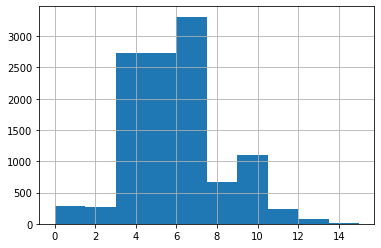

In [14]:
df["Final"].hist()

TypeError: 'value' must be an instance of str or bytes, not a float

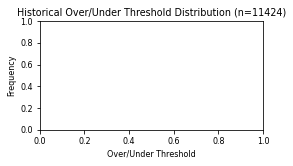

In [19]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 2)
# set plot title size to small
plt.rcParams["font.size"] = 8
plt.title(f"Historical Over/Under Threshold Distribution (n={len(closing_OU)})")
plt.ylabel("Frequency")
plt.xlabel("Over/Under Threshold")
df["CloseOU"].hist()